In [32]:
%pip install numpy
%pip install scikit-learn
%pip install numpy
%pip install pennylane
%pip install pennylane pennylane-qiskit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/317.4 kB ? eta -:--:--
     ------- ------------------------------- 61.4/317.4 kB 3.2 MB/s eta 0:00:01
     ------------------------------------ - 307.2/317.4 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 317.4/317.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/62.0 kB ? eta -:--:--
     ---------------------------------------- 62.0/62.0 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'do


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import numpy as np
import pennylane as qml

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

seed = 1234
np.random.seed(seed)

In [34]:
import numpy as np


class Perceptron:
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    # heaviside activation function
    def activation(self, z):
        return np.heaviside(z, 0)  # haviside(z) heaviside -> activation

    def fit(self, X, y):
        n_features = X.shape[1]

        # Initializing weights and bias
        self.weights = np.zeros((n_features))
        self.bias = 0

        # Iterating until the number of epochs
        for _ in range(self.epochs):

            # Traversing through the entire training set
            for i in range(len(X)):
                z = (
                    np.dot(X, self.weights) + self.bias
                )  # Finding the dot product and adding the bias
                y_pred = self.activation(z)  # Passing through an activation function

                # Updating weights and bias
                self.weights = (
                    self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                )
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])

        return self.weights, self.bias

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

In [35]:
x, y = load_wine(return_X_y=True)

x = x[: 59 + 71]
y = y[: 59 + 71]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.9)

In [36]:
perceptron = Perceptron(0.001, 100)
perceptron.fit(x_train, y_train)
pred = perceptron.predict(x_test)

accuracy_score(pred, y_test)

0.6153846153846154

In [37]:
report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.55      0.71        11
         1.0       0.29      1.00      0.44         2

    accuracy                           0.62        13
   macro avg       0.64      0.77      0.58        13
weighted avg       0.89      0.62      0.67        13



In [38]:
scaler = MaxAbsScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)
x_test = np.clip(x_test, 0, 1)

In [39]:
nqubits = 4
dev = qml.device("qiskit.aer", wires=nqubits)


@qml.qnode(dev)
def kernel_circ(a, b):
    # AmplitudeEmbedding returns an operation equivalent to the amplitude encoding of its first argument.
    # We also ask AmplitudeEmbedding to normalize each input vector for us, just as amplitude encoding
    # needs us to do, and, since our arrays have 13 elements instead of the required 16,
    # we set pad_with = 0 to fill the remaining values with zeros.
    qml.AmplitudeEmbedding(a, wires=range(nqubits), pad_with=0, normalize=True)

    # Also notice that we are using qml.adjoint to compute the
    # adjoint (or inverse) of the amplitude encoding of b
    qml.adjoint(
        qml.AmplitudeEmbedding(b, wires=range(nqubits), pad_with=0, normalize=True)
    )

    # We retrieve an array with the probabilities of measuring each possible state in the
    # computational basis. The first element of this array (that is, the probability of getting a
    # zero value in all the qubits) will be the output of our kernel.
    return qml.probs(wires=range(nqubits))

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


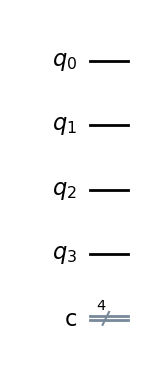

In [40]:
dev._circuit.draw(output="mpl")

In [43]:
# Initialize an empty list to store results
result = []

for a in x_train:
    # Initialize an empty list to store results for current value of a
    temp = []

    # Iterate over elements of B
    for b in y_train:
        # Apply kernel_circ(a, b) and append result to temp
        kernel = kernel_circ(a, b)[0]
        temp.append(kernel)
        print(f"Kernel of {a} and {b} is {kernel}")

    # Append temp to result
    result.append(temp)

# Convert result to a NumPy array
result_array = np.array(result)

ValueError: Features must be a one-dimensional tensor, or two-dimensional with batching; got shape ().

In [41]:
def qkernel(A, B):
    return np.array([[kernel_circ(a, b)[0] for b in B] for a in A])


svm = SVC(kernel=qkernel).fit(x_train, y_train)
pred = svm.predict(x_test)
print(accuracy_score(pred, y_test))

0.9230769230769231


In [42]:
report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.86      1.00      0.92         6

    accuracy                           0.92        13
   macro avg       0.93      0.93      0.92        13
weighted avg       0.93      0.92      0.92        13

